# Подготовка данных

In [1]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
all_data = pd.concat([train, test])
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
all_data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [5]:
# Преобразовывает строковые категориальные признаки в численные
def to_categorical(df, columns):
  for column in columns:
    for i, v in enumerate(df[column].dropna().unique()):
      df.loc[df[column] == v, column] = i
    df[column] = df[column].astype('float64')

  return df

In [6]:
all_data = to_categorical(all_data, ['Sex', 'Embarked'])

<Axes: >

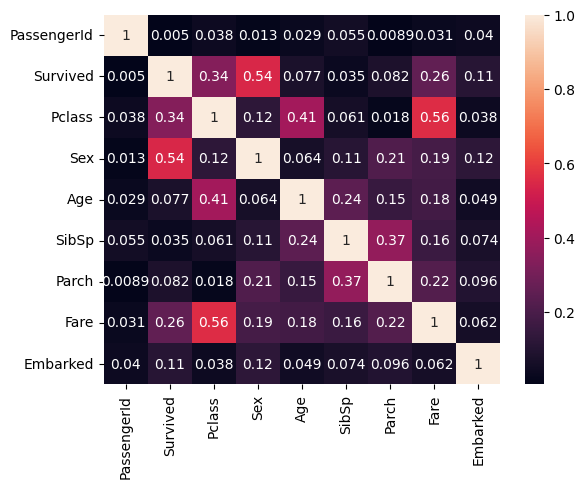

In [7]:
import seaborn as sns

# Просматриваем связь между признаками и визуализируем с помощью тепловой картой
corr = all_data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].corr().abs()
sns.heatmap(corr, annot=True)

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

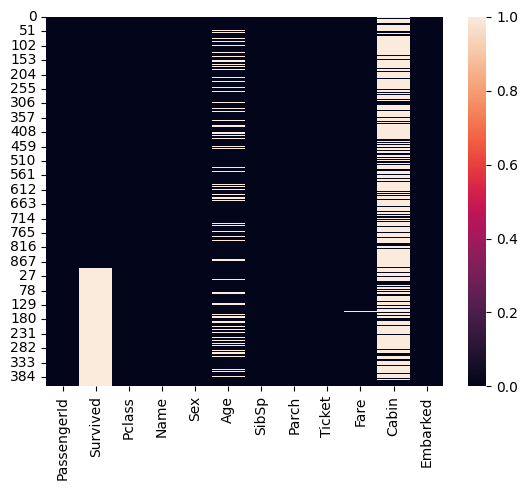

In [8]:
# Смотрим долю пропущенных значений и визуализируем с помощью тепловой карты
sns.heatmap(all_data.isnull())
all_data.isna().sum() / all_data.shape[0]

## Заполняем пропуски

### Убираем пропуски в колонке Fare

In [9]:
all_data[all_data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",0.0,60.5,0,0,3701,NaN,NaN,0.0


In [10]:
all_data[all_data.Pclass == 3].Fare.median()

8.05

In [11]:
# Заполняем пропуск медианой для 3го класса
all_data.at[152, 'Fare'] = all_data[all_data.Pclass == 3].Fare.median()

### Убираем пропуски в колонке Embarked

In [12]:
all_data[all_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1.0,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1.0,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Поскольку строки содержатся только в обучающей выборке, их можно безопасно удалить
all_data.drop(all_data[all_data.Embarked.isna()].index, inplace=True)

### Убираем пропуски в колонке Cabin

In [14]:
all_data.drop(['Cabin'], axis=1, inplace=True)

### Убираем пропуски в колонке Age

In [15]:
all_data.Age.fillna(all_data.Age.median(), inplace=True)

### Проверяем отсутствие пропусков

PassengerId    0.000000
Survived       0.319296
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
dtype: float64

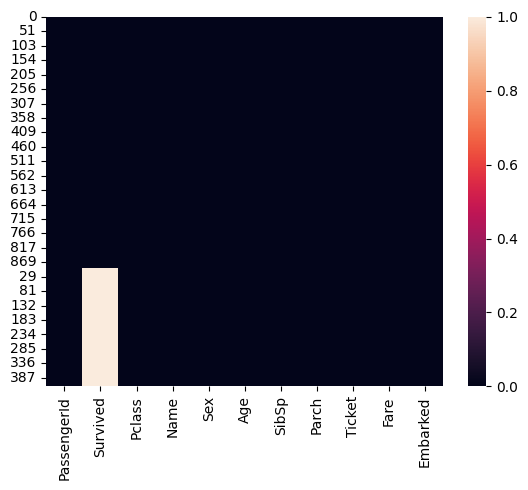

In [16]:
sns.heatmap(all_data.isnull())
all_data.isna().sum() / all_data.shape[0]

In [17]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0.0,28.0,0,0,A.5. 3236,8.0500,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1.0,39.0,0,0,PC 17758,108.9000,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0.0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0.0,28.0,0,0,359309,8.0500,0.0


## Трансформация значений ячеек

In [18]:
# Кодируем значения категориальных ячеек в One Hot Encoding (OHE)
def to_OHE(df, columns):
  for column in columns:
    for v in df[column].unique():
      df[column+str(v)] = (df[column] == v).astype('float64')
    df.drop(column, axis=1, inplace=True)
  return df

In [19]:
all_data = to_OHE(all_data, ['Pclass', 'Sex', 'Embarked'])
all_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass3,Pclass1,Pclass2,Sex0.0,Sex1.0,Embarked0.0,Embarked1.0,Embarked2.0
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
414,1306,NaN,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
415,1307,NaN,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
416,1308,NaN,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
# Убираем ненужные признаки
all_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
# Приводим все остальные значения к диапазону от 0 до 1
all_data = all_data / all_data.max()

In [22]:
# Разбиваем all_data на train и на test
all_data.reset_index(inplace=True)
all_data.drop(['index'], axis=1, inplace=True)

train = all_data.dropna()
test = all_data.drop(train.index)
train.shape, test.shape

((889, 13), (417, 13))

In [23]:
# Выделяем признаки на основе которых будет строиться предсказание (X) и разметку (y)
categories = train.columns[1:]
X = train[categories]
y = train['Survived']

In [24]:
from sklearn.model_selection import train_test_split

# Разбиваем X и y на тренировочные и валидационные подвыборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((711, 12), (178, 12), (711,), (178,))

# Обучение моделей

## LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

# Обучаем модель Логистической Регрессии для классификации
model = LogisticRegression(random_state=42)
model = model.fit(X_train, y_train)
pred = model.predict(X_val)

# Считаем среднее абсолютное отклонение
print(mean_absolute_error(pred, y_val))

0.21910112359550563


## DecisionTreeClassifier

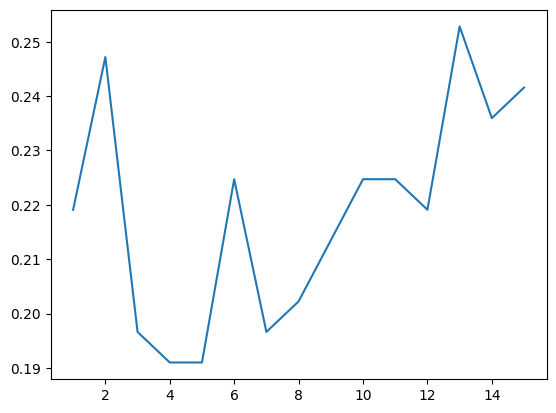

In [26]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

mae = []
max_depth = 15

# Определяем оптимальную глубину дерева
for i in range(1, max_depth + 1):
  model = DecisionTreeClassifier(max_depth=i, random_state=42)
  model = model.fit(X_train, y_train)
  pred = model.predict(X_val)
  mae.append(mean_absolute_error(pred, y_val))

plt.plot(list(range(1, max_depth + 1)), mae)

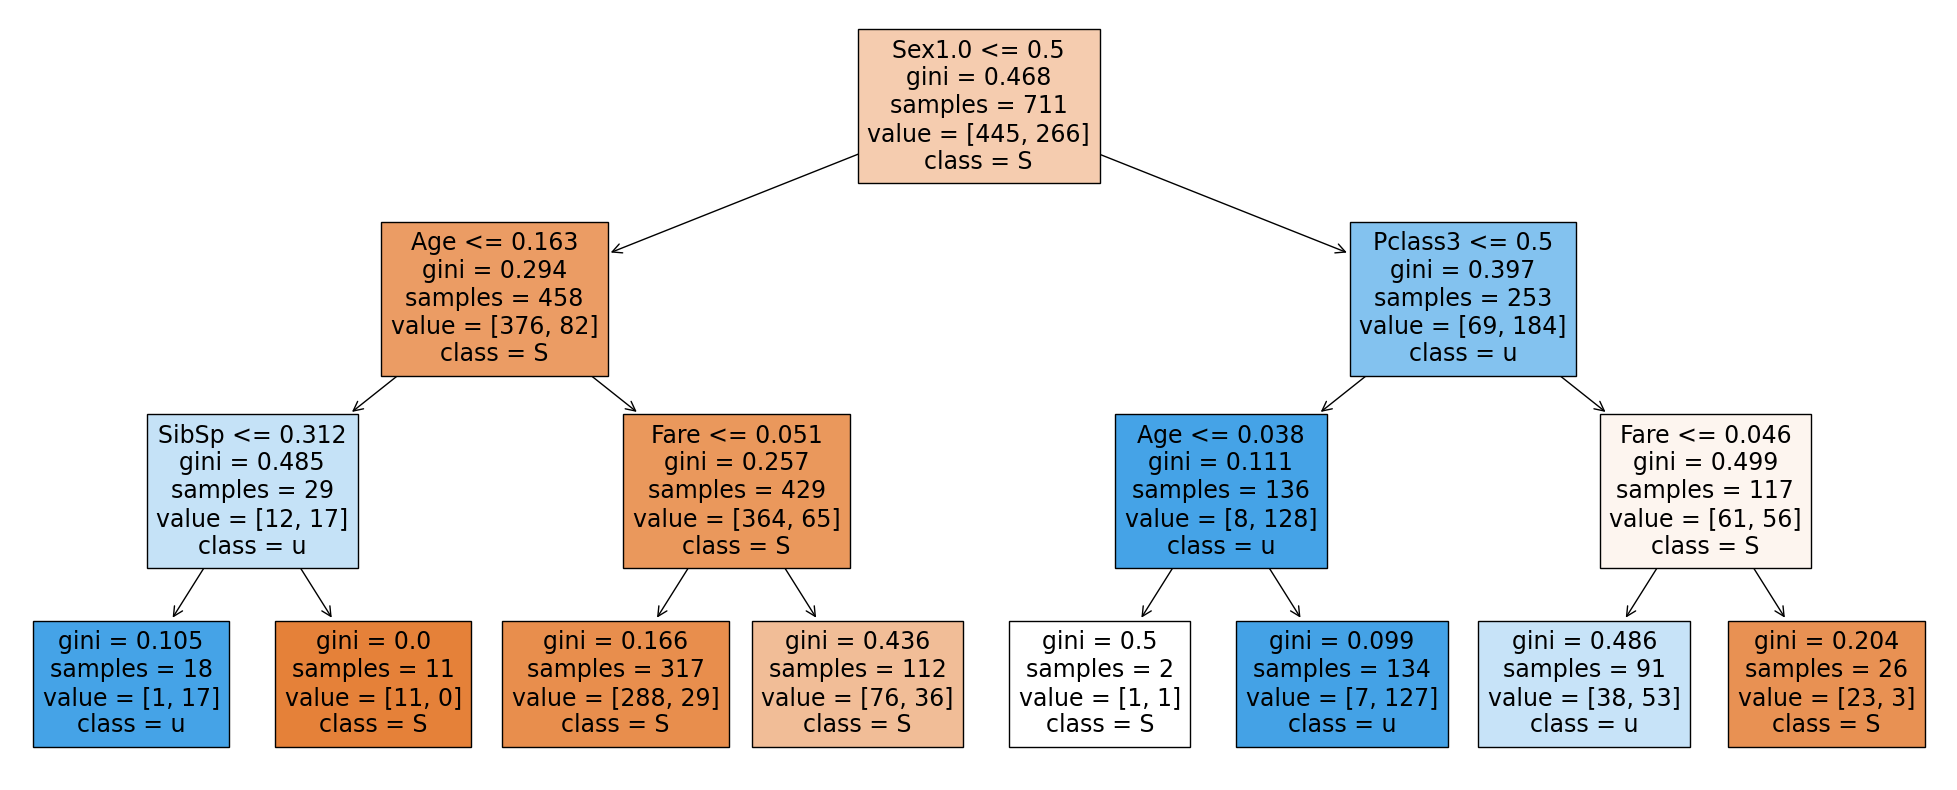

In [27]:
from sklearn.tree import plot_tree

# Визуализируем дерево решений для классификации глубиной 3
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)

fig = plt.figure(figsize=(25, 10))
_ = plot_tree(model,
              feature_names=X.columns,
              class_names=y.name,
              filled=True)

## KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Обучаем модель Логистической Регрессии для классификации
model = KNeighborsClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_val)
print(mean_absolute_error(pred, y_val))

0.24157303370786518


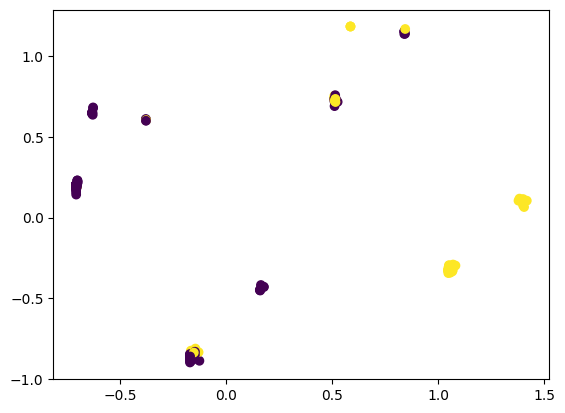

In [29]:
from sklearn.decomposition import PCA

# Понижаем размерность данных для визуализации на плоскости
pca = PCA(n_components=2)
points = pca.fit_transform(X_val)

plt.scatter(points[:, 0], points[:, 1], c=pred)
plt.show()

## Модель использующая полносвязные слои

In [30]:
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Записываем структуру модели
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1:])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Собираем модель (выбираем алгоритм подбора оптимальных весов(optimizer) и фунуцию потерь)
model.compile(optimizer=Adam(learning_rate=0.001), loss='MAE', metrics='MAE')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1505 (5.88 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Обучаем модель
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   epochs=100, batch_size=128)

Epoch 1/100
6/6 [==============================] - 2s 110ms/step - loss: 0.4850 - MAE: 0.4850 - val_loss: 0.4732 - val_MAE: 0.4732
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.4667 - MAE: 0.4667 - val_loss: 0.4566 - val_MAE: 0.4566
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 0.4470 - MAE: 0.4470 - val_loss: 0.4401 - val_MAE: 0.4401
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4279 - MAE: 0.4279 - val_loss: 0.4240 - val_MAE: 0.4240
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4099 - MAE: 0.4099 - val_loss: 0.4089 - val_MAE: 0.4089
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3924 - MAE: 0.3924 - val_loss: 0.3944 - val_MAE: 0.3944
Epoch 7/100
6/6 [==============================] - 0s 23ms/step - loss: 0.3760 - MAE: 0.3760 - val_loss: 0.3806 - val_MAE: 0.3806
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3605 - MAE: 0.3

In [32]:
# Оцениваем модель на валидационной выборке
model.evaluate(X_val, y_val)

6/6 [==============================] - 0s 3ms/step - loss: 0.1989 - MAE: 0.1989


[0.1988561451435089, 0.1988561451435089]

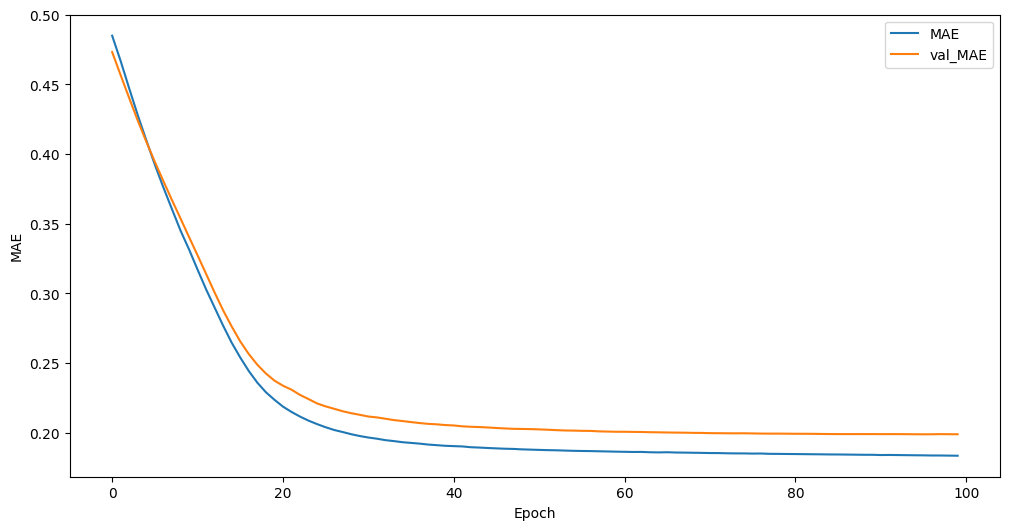

In [33]:
# Визуализируем графики процесса обучения
fig, axes = plt.subplots(figsize=(12, 6), ncols=1, nrows=1)

axes.plot(history.history['MAE'], label='MAE')
axes.plot(history.history['val_MAE'], label='val_MAE')
axes.set_xlabel("Epoch")
axes.set_ylabel("MAE")
axes.legend()

plt.show()

# Домашнее задание

## Применить представленные ранее модели для данных data для классификации листов ириса

In [34]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
columns = iris['feature_names'] + ['target']
data = pd.DataFrame(columns=iris['feature_names']+['target'],
                    data=np.concatenate([iris['data'], iris['target'].reshape(iris['target'].shape[0], 1)], axis=1))
data = data[data.target<2]

# Данные для дз
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0
